In [1]:
import svm_kernels.kernels as kn
import time as time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import svm, datasets
from sklearn.datasets import load_iris, load_digits, load_wine, load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
sns.set()

/home/benayas/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/home/benayas/git/svm-kernels/svm_kernels/k_functions.py:17: RuntimeWarning: invalid value encountered in sqrt
  return k / (np.sqrt(len(x) - np.dot(x, z)))


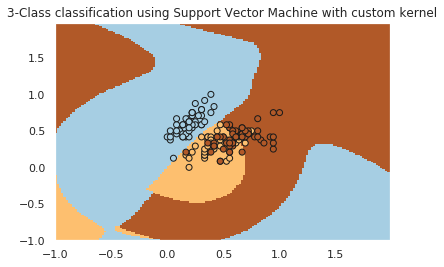

In [2]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
Y = iris.target

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

h = .02  # step size in the mesh

# we create an instance of SVM with our custom kernel and fit out data.
clf = svm.SVC(kernel=kn.chebyshev(degree=3))
clf.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('3-Class classification using Support Vector Machine with custom'
          ' kernel')
plt.axis('tight')
plt.show()

In [3]:
sets = [('Iris', load_iris), ('Wine',load_wine)]
kernel = [('RBF','rbf'),
          ('Hermite 2',kn.hermite(degree=2)),
          ('Hermite 3',kn.hermite(degree=3)),
          ('Chebyshev 2',kn.chebyshev(degree=2)),
          ('Chebyshev 3',kn.chebyshev(degree=3)),
         ]

df_results = pd.DataFrame()
cols = [[],[]]
results_all = np.zeros((len(kernel), 3*len(sets)))

for i,d in enumerate(sets):
    # Get data
    data, target = d[1](return_X_y=True)
    scaler = MinMaxScaler()
    data = scaler.fit_transform(data)
    cols[0] = cols[0] + [d[0]]*3
    cols[1] = cols[1] + ['mean','stdev','time']
    
    # Run all kernels
    for j,k in enumerate(kernel):
        print('Running test for dataset {} and kernel {}'.format(d[0],k[0]))
        clf = svm.SVC(kernel=k[1], gamma='auto')
        start = time.time()
        score = cross_val_score(clf, data, target, cv=5)
        results_all[j,i*3:i*3+3] = np.round(100*np.mean(score),3),np.round(100*np.std(score),3),np.round(time.time()-start,2)

cols = pd.MultiIndex.from_tuples(list(zip(*cols)), names=['Dataset', 'Value'])
df_results = pd.DataFrame( data= results_all, index=[k[0] for k in kernel] ,columns=cols)
df_results

Running test for dataset Iris and kernel RBF
Running test for dataset Iris and kernel Hermite 2
Running test for dataset Iris and kernel Hermite 3
Running test for dataset Iris and kernel Chebyshev 2
Running test for dataset Iris and kernel Chebyshev 3
Running test for dataset Wine and kernel RBF
Running test for dataset Wine and kernel Hermite 2
Running test for dataset Wine and kernel Hermite 3
Running test for dataset Wine and kernel Chebyshev 2
Running test for dataset Wine and kernel Chebyshev 3


Dataset        Iris                 Wine             
Value          mean  stdev  time    mean  stdev  time
RBF          96.000  2.494  0.01  96.648  1.029  0.01
Hermite 2    94.667  3.399  1.14  94.423  2.923  1.60
Hermite 3    98.000  2.667  2.10  94.980  3.209  2.96
Chebyshev 2  95.333  2.667  1.38  95.503  2.815  1.96
Chebyshev 3  96.667  2.108  2.54  96.078  2.207  3.59